In [1]:
from sklearn.cluster import KMeans
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot  as plt 


In [2]:
%matplotlib inline 

In [3]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
df = df.drop("Name",axis = 'columns')
df.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


Text(0, 0.5, 'Income ($)')

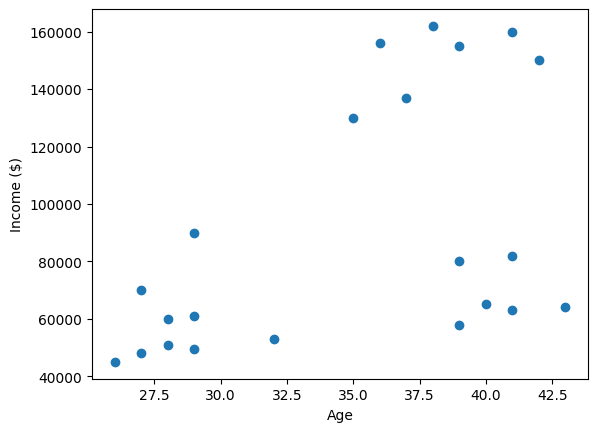

In [5]:
plt.scatter(df.Age,df["Income($)"])
plt.xlabel("Age")
plt.ylabel("Income ($)")



In [6]:
km =KMeans(n_clusters=3)
y_predicted = km.fit_predict(df)
y_predicted

c:\phython 3.7\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [7]:
df['Cluster1']=y_predicted
df.head(5)

,Age,Income($),Cluster1
0,27,70000,0
1,29,90000,0
2,29,61000,2
3,28,60000,2
4,42,150000,1


**clustering not happened properly**

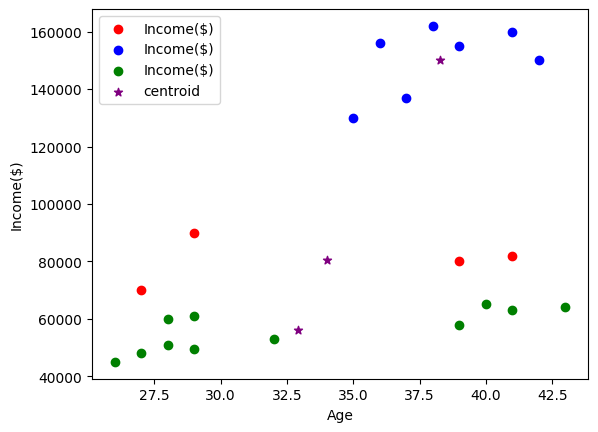

In [8]:
df1 = df[df.Cluster1==0]
df2 = df[df.Cluster1==1]
df3 = df[df.Cluster1==2]
plt.scatter(df1.Age,df1["Income($)"],color = "red",label = "Income($)")
plt.scatter(df2.Age,df2["Income($)"],color = "blue",label = "Income($)")
plt.scatter(df3.Age,df3["Income($)"],color = "green",label = "Income($)")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = "purple",marker="*",label= "centroid")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

# df3

**using MaxMinScaling to get proper Clusters**

In [9]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df["Income($)"] = scaler.transform(df[["Income($)"]])
scaler.fit(df[['Age']])
df["Age"] = scaler.transform(df[["Age"]])
df.head(10)

,Age,Income($),Cluster1
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,2
3,0.117647,0.128205,2
4,0.941176,0.897436,1
5,0.764706,0.940171,1
6,0.882353,0.982906,1
7,0.705882,1.000000,1
8,0.588235,0.948718,1
9,0.529412,0.726496,1


In [10]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted
df['Cluster2']=y_predicted
df.head()


c:\phython 3.7\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Age,Income($),Cluster1,Cluster2
0,0.058824,0.213675,0,1
1,0.176471,0.384615,0,1
2,0.176471,0.136752,2,1
3,0.117647,0.128205,2,1
4,0.941176,0.897436,1,0


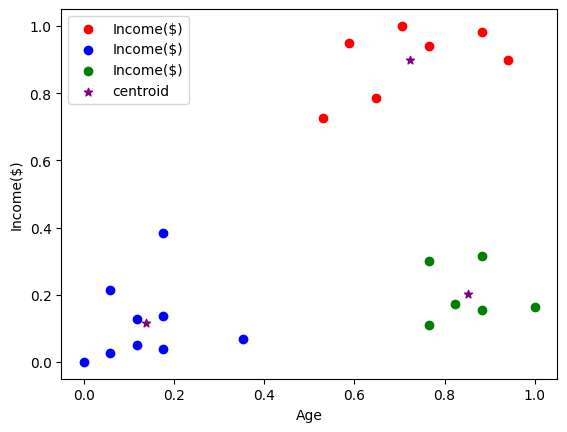

In [11]:
df1 = df[df.Cluster2==0]
df2 = df[df.Cluster2==1]
df3 = df[df.Cluster2==2]
plt.scatter(df1.Age,df1["Income($)"],color = "red",label = "Income($)")
plt.scatter(df2.Age,df2["Income($)"],color = "blue",label = "Income($)")
plt.scatter(df3.Age,df3["Income($)"],color = "green",label = "Income($)")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = "purple",marker="*",label= "centroid")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()


**Elbow Method to get optimum or suitable value of n_clusters**

In [12]:
sum_of_sq_errors=[]
n_rng =range(1,11)
for i in n_rng:
    km = KMeans(n_clusters= i)
    km.fit_predict(df[['Age','Income($)']])
    sum_of_sq_errors.append(km.inertia_)


    

c:\phython 3.7\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\phython 3.7\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\phython 3.7\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\phython 3.7\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the war

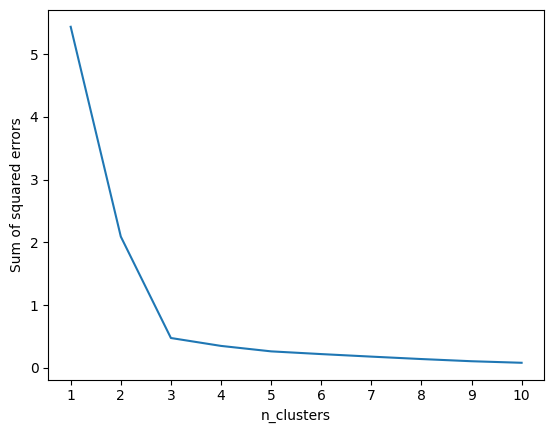

In [13]:
# plt.figure(figsize=[12,5])
plt.xlabel("n_clusters")
plt.ylabel("Sum of squared errors")
plt.xticks(n_rng)
plt.plot(n_rng,sum_of_sq_errors)

# Exercise

In [14]:
from sklearn.datasets import load_iris

In [15]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [16]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
df  = df.drop(["sepal length (cm)","sepal width (cm)"],axis='columns')
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [18]:
kf = KMeans(n_clusters=3)
y_predicted = kf.fit_predict(df)
df["cluster1"]=y_predicted
df

c:\phython 3.7\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,petal length (cm),petal width (cm),cluster1
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


In [19]:
df1 = df[df.cluster1==0]
df2 = df[df.cluster1==1]
df3 = df[df.cluster1==2]

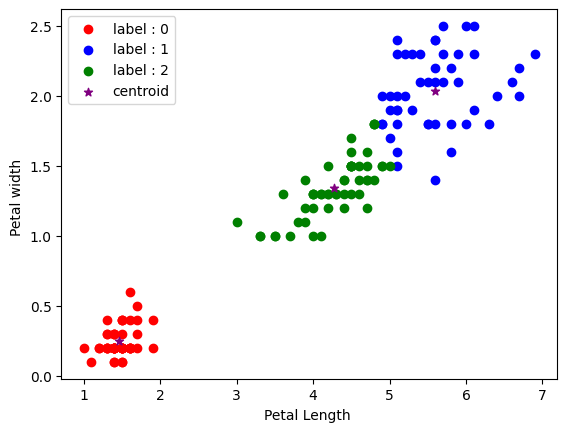

In [20]:
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color = "red",label = "label : 0")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],color = "blue",label = "label : 1")
plt.scatter(df3["petal length (cm)"],df3["petal width (cm)"],color = "green",label = "label : 2")
plt.scatter(kf.cluster_centers_[:,0],kf.cluster_centers_[:,1],color = "purple",marker="*",label= "centroid")
plt.xlabel("Petal Length ")
plt.ylabel("Petal width ")
plt.legend()


In [25]:
# df=df.drop(['cluster'],axis='columns')
df = df.drop(['cluster1'], axis='columns')


In [28]:
sse = []
num_itr =range(1,11)
for i in num_itr:
    km = KMeans(n_clusters=i)
    km.fit(df)
    sse.append(km.inertia_)


c:\phython 3.7\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\phython 3.7\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\phython 3.7\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\phython 3.7\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the war

([<matplotlib.axis.XTick at 0x194e1424eb0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

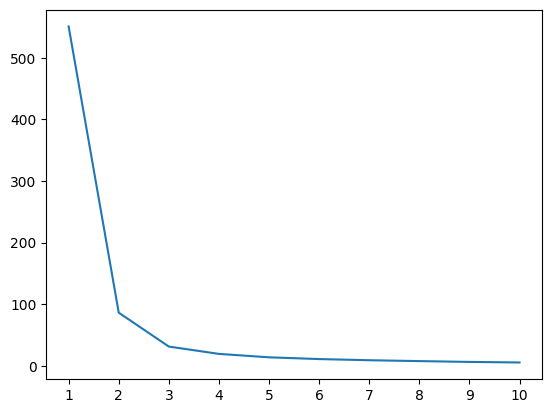

In [30]:
plt.plot(num_itr,sse)
plt.xticks(num_itr)
